<a href="https://colab.research.google.com/github/21800040/Kwon_Jihyun/blob/master/COVID19_%EC%8B%9C%EA%B0%81%ED%99%94_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [0]:
data_weather = pd.read_csv("/content/drive/My Drive/코로나_경진대회/Weather.csv")
data_pm_2= pd.read_csv('/content/drive/My Drive/코로나_경진대회/sidoAirInfo_2.csv')
data_pm_3 = pd.read_csv('/content/drive/My Drive/코로나_경진대회/sidoAirInfo_3.csv')
data_pm_4 = pd.read_csv('/content/drive/My Drive/코로나_경진대회/sidoAirInfo_4.csv')
data_patient = pd.read_csv('/content/drive/My Drive/코로나_경진대회/PatientInfo.csv')

확진자


In [58]:
display(data_patient)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,7000000008,9457.0,female,NaN,10s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25.0,NaN,2020-03-27,NaN,NaN,isolated
3249,7000000009,9651.0,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14.0,NaN,2020-03-29,NaN,NaN,isolated
3250,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18.0,NaN,2020-04-03,NaN,NaN,isolated
3251,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7.000000e+09,NaN,NaN,2020-04-03,NaN,NaN,isolated


In [59]:
# 지역별 확진자
data_confirmed = data_patient.loc[:,['province' ,'confirmed_date']]
display(data_confirmed)

,province,confirmed_date
0,Seoul,2020-01-23
1,Seoul,2020-01-30
2,Seoul,2020-01-30
3,Seoul,2020-01-30
4,Seoul,2020-01-31
...,...,...
3248,Jeju-do,2020-03-27
3249,Jeju-do,2020-03-29
3250,Jeju-do,2020-04-03
3251,Jeju-do,2020-04-03


In [0]:
# 대구, 서울, 경기도, 경상북도

confirmed_daegu = data_confirmed[data_confirmed['province'] == 'Daegu']
confirmed_seoul = data_confirmed[data_confirmed['province'] == 'Seoul']
confirmed_gg = data_confirmed[data_confirmed['province'] == 'Gyeonggi-do']
confirmed_gs = data_confirmed[data_confirmed['province'] == 'Gyeongsangbuk-do']

# 확진자수
confirmednum_daegu = confirmed_daegu.groupby('confirmed_date').size()
confirmednum_seoul = confirmed_seoul.groupby('confirmed_date').size()
confirmednum_gg = confirmed_gg.groupby('confirmed_date').size()
confirmednum_gs = confirmed_gs.groupby('confirmed_date').size()

data_confirmed_daegu = pd.DataFrame(confirmednum_daegu)
data_confirmed_seoul = pd.DataFrame(confirmednum_seoul)
data_confirmed_gg = pd.DataFrame(confirmednum_gg)
data_confirmed_gs = pd.DataFrame(confirmednum_gs)

In [61]:
display(data_confirmed_daegu)

,0
confirmed_date,
2020-02-18,6
2020-02-19,20
2020-02-20,18
2020-02-21,1
2020-02-24,1
2020-02-25,1
2020-02-26,1
2020-02-27,2
2020-02-28,3


In [62]:
data_confirmed_daegu.reset_index(level=0, inplace=True)
data_confirmed_daegu.rename(columns={data_confirmed_daegu.columns[1]: "num"}, inplace=True)
data_confirmed_seoul.reset_index(level=0, inplace=True)
data_confirmed_seoul.rename(columns={data_confirmed_seoul.columns[1]: "num"}, inplace=True)
data_confirmed_gg.reset_index(level=0, inplace=True)
data_confirmed_gg.rename(columns={data_confirmed_gg.columns[1]: "num"}, inplace=True)
data_confirmed_gs.reset_index(level=0, inplace=True)
data_confirmed_gs.rename(columns={data_confirmed_gs.columns[1]: "num"}, inplace=True)

display(data_confirmed_daegu)

,confirmed_date,num
0,2020-02-18,6
1,2020-02-19,20
2,2020-02-20,18
3,2020-02-21,1
4,2020-02-24,1
5,2020-02-25,1
6,2020-02-26,1
7,2020-02-27,2
8,2020-02-28,3
9,2020-02-29,3


In [63]:
fig_conf_daegu = px.line(data_confirmed_daegu, x='confirmed_date', y='num', title='확진자: 대구')
fig_conf_daegu.update_layout(xaxis_range=['2020.1.15','2020.4.30'], xaxis_title='날짜', yaxis_title='확진자')
fig_conf_daegu.show()

In [64]:
fig_conf_seoul = px.line(data_confirmed_seoul, x='confirmed_date', y='num', title='확진자: 서울')
fig_conf_seoul.update_layout(xaxis_range=['2020.1.15','2020.4.30'], xaxis_title='날짜', yaxis_title='확진자')
fig_conf_seoul.show()

In [65]:
fig_conf_gs = px.line(data_confirmed_gs, x='confirmed_date', y='num', title='확진자: 경상북도')
fig_conf_gs.update_layout(xaxis_range=['2020.1.15','2020.4.30'], xaxis_title='날짜', yaxis_title='확진자')
fig_conf_gs.show()

In [66]:
fig_conf_gg = px.line(data_confirmed_gg, x='confirmed_date', y='num', title='확진자: 경기도')
fig_conf_gg.update_layout(xaxis_range=['2020.1.15','2020.4.30'], xaxis_title='날짜', yaxis_title='확진자')
fig_conf_gg.show()

풍속

In [67]:
display(data_weather)

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9
...,...,...,...,...,...,...,...,...,...,...
25130,50000,Jeollabuk-do,2020-04-19,11.2,8.0,16.1,15.5,2.5,20.0,85.3
25131,51000,Jeollanam-do,2020-04-19,12.0,10.6,13.4,29.1,8.5,90.0,88.4
25132,60000,Gyeongsangbuk-do,2020-04-19,10.2,5.5,15.0,27.4,5.0,70.0,90.8
25133,61000,Gyeongsangnam-do,2020-04-19,11.1,9.6,14.2,30.0,4.5,70.0,82.3


In [0]:
data_weather_loc = data_weather.loc[23599:,['province','date','max_wind_speed','avg_relative_humidity']]

# 서울, 대구 데이터만
data_weather_seoul = data_weather.loc[data_weather['province']=='Seoul']
data_weather_daegu = data_weather.loc[data_weather['province']=='Daegu']

In [69]:
fig_wind_seoul = px.line(data_weather_seoul, x="date", y="max_wind_speed", range_x=['2020-01-15','2020-04-19'], title='풍속: 1-4월 서울')
#fig_wind_jan_seoul = px.line(data_weather_seoul, x="date", y="max_wind_speed", range_x=['2020-01-15','2020-01-31'], title='풍속: 1월 서울')
#fig_wind_feb_seoul = px.line(data_weather_seoul, x="date", y="max_wind_speed", range_x=['2020-02-01','2020-02-29'], title='풍속: 2월 서울')
#fig_wind_mar_seoul = px.line(data_weather_seoul, x="date", y="max_wind_speed", range_x=['2020-03-01','2020-03-31'], title='풍속: 3월 서울')
#fig_wind_apr_seoul = px.line(data_weather_seoul, x="date", y="max_wind_speed", range_x=['2020-04-01','2020-04-19'], title='풍속: 4월 서울')
fig_wind_seoul.show()
#fig_wind_jan_seoul.show()
#fig_wind_feb_seoul.show()
#fig_wind_mar_seoul.show()
#fig_wind_apr_seoul.show()

In [70]:
fig_wind_daegu = px.line(data_weather_daegu, x="date", y="max_wind_speed", range_x=['2020-01-15','2020-04-19'], title='풍속: 1-4월 대구')
#fig_wind_jan_daegu = px.line(data_weather_daegu, x="date", y="max_wind_speed", range_x=['2020-01-15','2020-01-31'], title='풍속: 1월 대구')
#fig_wind_feb_daegu = px.line(data_weather_daegu, x="date", y="max_wind_speed", range_x=['2020-02-01','2020-02-29'], title='풍속: 2월 대구')
#fig_wind_mar_daegu = px.line(data_weather_daegu, x="date", y="max_wind_speed", range_x=['2020-03-01','2020-03-31'], title='풍속: 3월 대구')
#fig_wind_apr_daegu = px.line(data_weather_daegu, x="date", y="max_wind_speed", range_x=['2020-04-01','2020-04-19'], title='풍속: 4월 대구')
fig_wind_daegu.show()
#fig_wind_jan_daegu.show()
#fig_wind_feb_daegu.show()
#fig_wind_mar_daegu.show()
#fig_wind_apr_daegu.show()

습도

In [71]:
fig_hum_seoul = px.line(data_weather_seoul, x="date", y="avg_relative_humidity", range_x=['2020-01-15','2020-04-19'], title='습도: 1-4월 서울')
#fig_hum_jan_seoul = px.line(data_weather_seoul, x="date", y="avg_relative_humidity", range_x=['2020-01-15','2020-01-31'], title='습도: 1월 서울')
#fig_hum_feb_seoul = px.line(data_weather_seoul, x="date", y="avg_relative_humidity", range_x=['2020-02-01','2020-02-29'], title='습도: 2월 서울')
#fig_hum_mar_seoul = px.line(data_weather_seoul, x="date", y="avg_relative_humidity", range_x=['2020-03-01','2020-03-31'], title='습도: 3월 서울')
#fig_hum_apr_seoul = px.line(data_weather_seoul, x="date", y="avg_relative_humidity", range_x=['2020-04-01','2020-04-19'], title='습도: 4월 서울')
fig_hum_seoul.show()
#fig_hum_jan_seoul.show()
#fig_hum_feb_seoul.show()
#fig_hum_mar_seoul.show()
#fig_hum_apr_seoul.show()

In [72]:
fig_hum_daegu = px.line(data_weather_daegu, x="date", y="avg_relative_humidity", range_x=['2020-01-15','2020-04-19'], title='습도: 1-4월 대구')
#fig_hum_jan_daegu = px.line(data_weather_daegu, x="date", y="avg_relative_humidity", range_x=['2020-01-15','2020-01-31'], title='습도: 1월 대구')
#fig_hum_feb_daegu = px.line(data_weather_daegu, x="date", y="avg_relative_humidity", range_x=['2020-02-01','2020-02-29'], title='습도: 2월 대구')
#fig_hum_mar_daegu = px.line(data_weather_daegu, x="date", y="avg_relative_humidity", range_x=['2020-03-01','2020-03-31'], title='습도: 3월 대구')
#fig_hum_apr_daegu = px.line(data_weather_daegu, x="date", y="avg_relative_humidity", range_x=['2020-04-01','2020-04-19'], title='습도: 4월 대구')
fig_hum_daegu.show()
#fig_hum_jan_daegu.show()
#fig_hum_feb_daegu.show()
#fig_hum_mar_daegu.show()
#fig_hum_apr_daegu.show()

미세먼지

In [0]:
data_pm_2 = data_pm_2.iloc[::-1].reset_index(drop=True)

In [0]:
data_pm_3 = data_pm_3.iloc[::-1].reset_index(drop=True)

In [0]:
data_pm_4 = data_pm_4.iloc[::-1].reset_index(drop=True)

In [0]:
data_pm = pd.concat([data_pm_2, data_pm_3, data_pm_4])
data_pm_daegu = data_pm.loc[:,['날짜','대구']]
data_pm_seoul = data_pm.loc[:,['날짜','서울']]

In [77]:
display(data_pm)

,날짜,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종
0,2020-02-01,52,40,53,42,45,45,39,54,44,54,55,47,40,44,39,35,50
1,2020-02-02,54,60,63,45,46,50,51,54,52,65,58,50,39,54,55,35,61
2,2020-02-03,16,34,27,12,26,24,24,16,20,27,23,27,20,26,27,22,24
3,2020-02-04,16,23,20,13,17,19,16,18,21,25,20,19,18,16,21,16,20
4,2020-02-05,11,18,14,8,11,10,12,9,11,12,11,11,11,13,13,17,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,2020-04-24,13,12,11,10,12,10,12,13,14,12,12,11,10,12,9,17,9
24,2020-04-25,23,20,21,19,27,23,20,22,24,25,24,25,23,22,20,27,23
25,2020-04-26,14,24,19,11,14,13,21,14,16,18,15,15,16,21,19,23,12
26,2020-04-27,16,16,17,13,15,14,16,17,14,16,17,17,13,14,14,13,13


In [78]:
fig_pm_daegu = px.line(data_pm_daegu, x="날짜", y="대구", range_x=['2020-02-01','2020-04-05'], title='미세먼지: 2-4월 대구')
fig_pm_daegu.update_layout(yaxis_title="미세먼지 수치")
fig_pm_daegu.show()

In [79]:
fig_pm_seoul = px.line(data_pm_seoul, x="날짜", y="서울", range_x=['2020-02-01','2020-04-05'], title='미세먼지: 2-4월 서울')
fig_pm_seoul.update_layout(yaxis_title="미세먼지 수치")
fig_pm_seoul.show()

In [153]:
#두개의 데이터 합침(미세먼지 대구 & 대구 확진자)
confirmed_and_air_daegu = pd.merge(data_pm, data_confirmed_daegu, left_on = '날짜', right_on = 'confirmed_date' )
confirmed_and_air_daegu.head(10)

,날짜,서울,부산,대구,인천,광주,대전,울산,경기,강원,충북,충남,전북,전남,경북,경남,제주,세종,confirmed_date,num
0,2020-02-18,15,15,15,12,11,14,12,15,17,18,15,13,9,14,12,12,14,2020-02-18,6
1,2020-02-19,24,20,21,20,16,19,15,24,19,27,21,18,13,16,17,14,26,2020-02-19,20
2,2020-02-20,44,28,37,33,23,31,27,44,31,44,35,31,21,29,27,22,45,2020-02-20,18
3,2020-02-21,45,26,36,31,25,35,27,46,44,48,39,35,22,30,25,13,52,2020-02-21,1
4,2020-02-24,19,14,20,15,11,15,13,21,21,23,17,16,10,15,13,8,18,2020-02-24,1
5,2020-02-25,13,7,11,12,13,7,7,13,13,14,14,9,13,10,7,27,14,2020-02-25,1
6,2020-02-26,10,10,12,9,8,10,10,10,7,11,14,11,8,9,9,14,11,2020-02-26,1
7,2020-02-27,7,8,7,8,26,17,6,11,7,17,27,29,21,7,11,17,20,2020-02-27,2
8,2020-02-28,18,11,18,19,12,15,12,23,16,19,29,23,10,13,14,8,20,2020-02-28,3
9,2020-02-29,17,12,22,13,9,16,10,18,15,23,24,14,11,15,13,8,21,2020-02-29,3


In [154]:
#열 합치기 & 대구만 저장
fix_comb_data = confirmed_and_air_daegu.loc[:,['날짜' ,'num','대구']]
fix_comb_data.head(10)

,날짜,num,대구
0,2020-02-18,6,15
1,2020-02-19,20,21
2,2020-02-20,18,37
3,2020-02-21,1,36
4,2020-02-24,1,20
5,2020-02-25,1,11
6,2020-02-26,1,12
7,2020-02-27,2,7
8,2020-02-28,3,18
9,2020-02-29,3,22


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51676 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 45216 missing from current font.

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 51676 missing from current font.



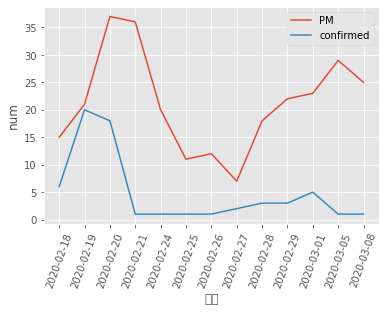

"\nx = '날짜'\ny = 'num'\ny2 = '대구'\nplt.plot(fix_comb_data.x, fix_comb_data.y , label = 'confirmed')\n\nplt.xlabel('date')\nplt.ylabel('rate')\n\nplt.title('The relationship between air pollution and corona in Deagu')\nplt.legend() #PM은 미세먼지수치를 지칭\nplt.show()\n"

In [155]:
import seaborn as sns
sns.lineplot(x="날짜", y="대구", label = 'PM', data = fix_comb_data)
sns.lineplot(x="날짜", y="num", label = 'confirmed', data = fix_comb_data)

plt.xticks(rotation = 70)
plt.legend()
plt.show()

'''
x = '날짜'
y = 'num'
y2 = '대구'
plt.plot(fix_comb_data.x, fix_comb_data.y , label = 'confirmed')

plt.xlabel('date')
plt.ylabel('rate')

plt.title('The relationship between air pollution and corona in Deagu')
plt.legend() #PM은 미세먼지수치를 지칭
plt.show()
'''